In [1]:
import itertools
import random
import pandas as pd

# Fonction pour calculer les bits de parité
def calculate_parity_bits(data):
    d1, d2, d3, d4 = data
    p1 = d1 ^ d2 ^ d4
    p2 = d1 ^ d3 ^ d4
    p3 = d2 ^ d3 ^ d4
    return p1, p2, p3

# Fonction pour générer un mot de code Hamming (7,4)
def generate_hamming_code(data):
    p1, p2, p3 = calculate_parity_bits(data)
    return [p1, p2, data[0], p3, data[1], data[2], data[3]]

# Fonction pour introduire des erreurs dans un mot de code
def introduce_error(code, num_errors=1):
    code = code.copy()
    error_positions = random.sample(range(7), num_errors)
    for pos in error_positions:
        code[pos] ^= 1  # Inverser le bit
    return code

# Générer toutes les combinaisons de 4 bits de données
all_data = list(itertools.product([0, 1], repeat=4))

# Générer la base de données
dataset = []
for data in all_data:
    code = generate_hamming_code(data)
    # Ajouter des échantillons sans erreur
    dataset.append((code, list(data)))
    # Ajouter des échantillons avec une erreur
    code_with_error = introduce_error(code, num_errors=1)
    dataset.append((code_with_error, list(data)))

# Afficher quelques échantillons pour vérification
for i in range(5):
    print(f"Entrée: {dataset[i][0]}, Sortie: {dataset[i][1]}")

Entrée: [0, 0, 0, 0, 0, 0, 0], Sortie: [0, 0, 0, 0]
Entrée: [0, 0, 0, 0, 0, 0, 1], Sortie: [0, 0, 0, 0]
Entrée: [1, 1, 0, 1, 0, 0, 1], Sortie: [0, 0, 0, 1]
Entrée: [1, 1, 0, 0, 0, 0, 1], Sortie: [0, 0, 0, 1]
Entrée: [0, 1, 0, 1, 0, 1, 0], Sortie: [0, 0, 1, 0]


In [4]:
from ecc import HammingCode

hamming = HammingCode(3)  # Hamming(7,4)
data = [1, 0, 1, 1]

# Encoder
encoded_data = hamming.encode(data)
print(f"Encoded: {encoded_data}")

# Décoder
decoded_data = hamming.decode(encoded_data)
print(f"Decoded: {decoded_data}")

ImportError: cannot import name 'HammingCode' from 'ecc' (C:\Users\CyberVortex\anaconda3\Lib\site-packages\ecc\__init__.py)

In [2]:
# Convertir la base de données en DataFrame
df = pd.DataFrame(dataset, columns=["Entree", "Sortie"])

# Afficher les premières lignes du DataFrame
print(df.head())

                  Entree        Sortie
0  [0, 0, 0, 0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 1, 0, 0, 0]  [0, 0, 0, 0]
2  [1, 1, 0, 1, 0, 0, 1]  [0, 0, 0, 1]
3  [1, 1, 0, 1, 0, 0, 0]  [0, 0, 0, 1]
4  [0, 1, 0, 1, 0, 1, 0]  [0, 0, 1, 0]


In [3]:
# Exporter en CSV
df.to_csv("hamming_dataset.csv", index=False)
print("Base de données exportée en CSV.")

Base de données exportée en CSV.


In [4]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("hamming_dataset.csv")

# Afficher les premières lignes
print(df.head())

                  Entree        Sortie
0  [0, 0, 0, 0, 0, 0, 0]  [0, 0, 0, 0]
1  [0, 0, 0, 1, 0, 0, 0]  [0, 0, 0, 0]
2  [1, 1, 0, 1, 0, 0, 1]  [0, 0, 0, 1]
3  [1, 1, 0, 1, 0, 0, 0]  [0, 0, 0, 1]
4  [0, 1, 0, 1, 0, 1, 0]  [0, 0, 1, 0]


In [5]:
import numpy as np

# Séparer les entrées et les sorties
X = np.array([sample[0] for sample in dataset])  # Entrées (7 bits)
y = np.array([sample[1] for sample in dataset])  # Sorties (4 bits)

# Afficher les formes des tableaux pour vérification
print("Forme de X (entrées) :", X.shape)  # Doit être (nombre d'échantillons, 7)
print("Forme de y (sorties) :", y.shape)  # Doit être (nombre d'échantillons, 4)

Forme de X (entrées) : (32, 7)
Forme de y (sorties) : (32, 4)


In [6]:
from sklearn.model_selection import train_test_split

# Diviser les données : 80% pour l'entraînement, 20% pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les formes des ensembles
print("Forme de X_train :", X_train.shape)
print("Forme de X_test :", X_test.shape)
print("Forme de y_train :", y_train.shape)
print("Forme de y_test :", y_test.shape)

Forme de X_train : (25, 7)
Forme de X_test : (7, 7)
Forme de y_train : (25, 4)
Forme de y_test : (7, 4)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Créer le modèle
model = Sequential([
    Dense(16, input_dim=7, activation='relu'),  # Couche cachée avec 16 neurones
    Dense(8, activation='relu'),               # Couche cachée avec 8 neurones
    Dense(4, activation='sigmoid')             # Couche de sortie avec 4 neurones
])

# Afficher un résumé du modèle
model.summary()

C:\Users\CyberVortex\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 300 (1.17 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',                # Optimiseur Adam
              loss='binary_crossentropy',      # Fonction de perte pour des sorties binaires
              metrics=['accuracy'])            # Métrique : précision

In [9]:
history = model.fit(X_train, y_train, 
                    epochs=50,                 # Nombre d'itérations sur l'ensemble d'entraînement
                    batch_size=16,             # Taille des lots pour la descente de gradient
                    validation_data=(X_test, y_test))  # Données de validation

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.2225 - loss: 0.7045 - val_accuracy: 0.2857 - val_loss: 0.6802
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2375 - loss: 0.6939 - val_accuracy: 0.2857 - val_loss: 0.6803
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.1483 - loss: 0.6979 - val_accuracy: 0.2857 - val_loss: 0.6808
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1483 - loss: 0.6951 - val_accuracy: 0.2857 - val_loss: 0.6810
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1692 - loss: 0.6903 - val_accuracy: 0.2857 - val_loss: 0.6813
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0800 - loss: 0.6919 - val_accuracy: 0.2857 - val_loss: 0.6817
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.1217 - loss: 0.6878 - val_accuracy: 0.2857 - val_loss: 0.6820
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.1425 - loss: 0.6858 - val_accuracy: 0.2857 - val_loss: 0.682

In [10]:
# Évaluer le modèle sur l'ensemble de test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perte sur l'ensemble de test : {loss}")
print(f"Précision sur l'ensemble de test : {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2857 - loss: 0.6596
Perte sur l'ensemble de test : 0.6595969796180725
Précision sur l'ensemble de test : 0.2857142984867096


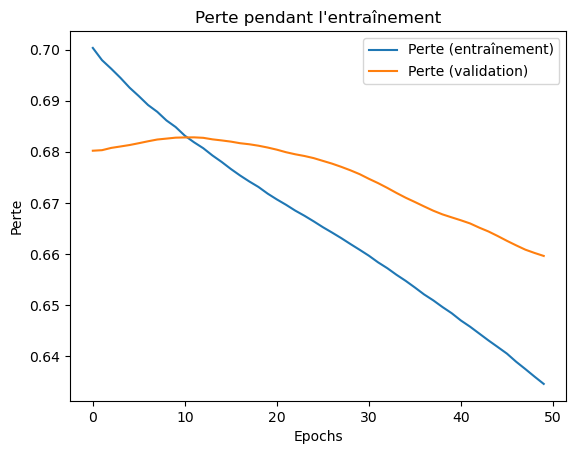

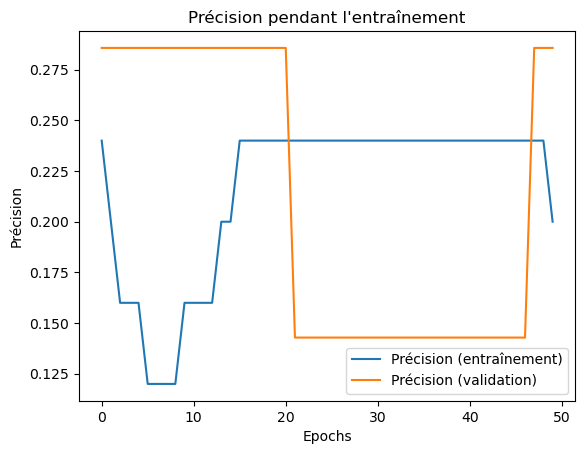

In [11]:
import matplotlib.pyplot as plt

# Tracer la perte
plt.plot(history.history['loss'], label='Perte (entraînement)')
plt.plot(history.history['val_loss'], label='Perte (validation)')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Tracer la précision
plt.plot(history.history['accuracy'], label='Précision (entraînement)')
plt.plot(history.history['val_accuracy'], label='Précision (validation)')
plt.title('Précision pendant l\'entraînement')
plt.xlabel('Epochs')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [12]:
# Exemple de mot de code avec une erreur
new_code = [1, 0, 1, 1, 0, 1, 0]  # Remplacez par votre propre mot de code
new_code = np.array([new_code])    # Convertir en format adapté pour le modèle

# Faire une prédiction
prediction = model.predict(new_code)
print("Prédiction du modèle :", np.round(prediction))  # Arrondir les valeurs pour obtenir des bits

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Prédiction du modèle : [[1. 0. 1. 0.]]


In [13]:
new_code_with_error = [1, 0, 0, 1, 0, 1, 0]  # Erreur dans le 3ème bit
new_code_with_error = np.array([new_code_with_error])  # Convertir en format adapté
prediction_with_error = model.predict(new_code_with_error)
print("Prédiction du modèle (avec erreur) :", np.round(prediction_with_error))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prédiction du modèle (avec erreur) : [[1. 0. 1. 0.]]
